<a href="https://colab.research.google.com/github/anassimbeni/MBAUSP/blob/main/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA USP - Data Wrangling

## Definições Básicas

Para a execução dos scripts das aulas será necessária a utilização de bibliotecas como dplyr e ggplot2 que estão contidas no pacote tidyverse.

*Obs, na utilização do google colab não é necessária realizar a instalação, somente a declaração, porém em softwares como o RStudio se faz necessária instalação através do comando:

install.packages("tidyverse")

In [140]:
library(tidyverse)

Realizaremos a leitura de arquivos no formato excel para importar os dados a serem trabalhados, portanto é necessário declarar a biblioteca readxl.

In [141]:
library(readxl)

### Carregamento de arquivos

Para realização das atividades algumas base de dados precisam ser carregadas, estão estão armazenadas no google drive e são localizadas pelo hash "id", se ocorrer erros substituir os arquivos.

**(1.2) Dataset Aula Data Wrangling.xls**

In [142]:
system("gdown --id 1VAevjCUexLb03jLj10vZsJDvhiue5fsm")

**(1.3) Dataset Aula Data Wrangling (Join).xls**

In [143]:
system("gdown --id 1dVoBogi3f6QbBHSylz_jqnCqf7r6016Y")

**(2.2) WHO COVID-19 Global Table.csv**

In [144]:
system("gdown --id 1eEGBKktlrOM11rrQlnXT0IkRCYcR1OYH")

**(2.3) WBD PIB per Capita.xls**

In [145]:
system("gdown --id 18aq9ivWWWGBYLUs5JS1yGuGgQGrwLF_z")

**(4.2) CVM Resultado Wrangling.xlsx**

In [146]:
system("gdown --id 1OSYjHFjW3yIUIMi1sJ-6GJyBuh4-FYSl")

**(4.3) CVM Dados Cadastrais.xlsx**

In [147]:
system("gdown --id 1czRw5avAz-G65eEU_z9LXDeY556R0DUl")

**(5.2) Champions League 2020-2021.csv**

In [148]:
system("gdown --id 1vkQSzP0Ab_eYOkIlHiMTf--4knUz8Qal")

**(6.2) Filmes Streaming.csv**

In [149]:
system("gdown --id 1F4AzGq7qyGGcp30hFcNxsMuWhEs8ixw4")

**(6.3) Séries Streaming.csv**

In [150]:
system("gdown --id 1mvlIzlMhEFAs-axYjLMmnuxPFgAFd6jK")

## Aula I

###Lendo arquivos

**read_excel** realiza a leitura de arquivos excel.

In [151]:
dataset_inicial <- read_excel("(1.2) Dataset Aula Data Wrangling.xls")

**reas.csv** realiza a leitura de arquivos em csv.



In [152]:
dataset_csv <- read.csv("(2.2) WHO COVID-19 Global Table.csv", #<-- Arquivo
                        header = TRUE, #<-- O CSV possui cabeçalho
                        sep = ",", #<-- Separador de informações do CSV
                        dec = ".")  #<-- Ponto de separação decimal 10.00

###Visualizando Dataset

**View** realiza a visualização do arquivo no formato de tabela para matrizes.

In [153]:
View(dataset_inicial)

Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado
Letícia,40,20,1,Tarde,agressivo
Luiz Ovídio,50,25,2,Tarde,agressivo
Leonor,25,11,1,Manhã,moderado
Ana,10,5,0,Manhã,calmo
Antônio,55,32,3,Tarde,calmo
Júlia,35,28,1,Manhã,moderado


**head** mostra somente as primeiras linhas sendo estas limitadas ao parâmetro n.

In [154]:
head(dataset_inicial, n=5)

Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado
Letícia,40,20,1,Tarde,agressivo
Luiz Ovídio,50,25,2,Tarde,agressivo


**tail** semelhante ao head, porém mostra as ultimas linhas limitadas ao parâmetro n.

In [155]:
tail(dataset_inicial, n=5)

Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Leonor,25,11,1,Manhã,moderado
Ana,10,5,0,Manhã,calmo
Antônio,55,32,3,Tarde,calmo
Júlia,35,28,1,Manhã,moderado
Mariana,30,20,1,Manhã,moderado


**str** mostra a estrutura do dataset.

In [156]:
str(dataset_inicial)

tibble [10 × 6] (S3: tbl_df/tbl/data.frame)
 $ Estudante                                      : chr [1:10] "Gabriela" "Dalila" "Gustavo" "Letícia" ...
 $ Tempo para chegar à escola (minutos)           : num [1:10] 15 20 20 40 50 25 10 55 35 30
 $ Distância percorrida até a escola (quilômetros): num [1:10] 8 6 15 20 25 11 5 32 28 20
 $ Quantidade de semáforos                        : num [1:10] 0 1 0 1 2 1 0 3 1 1
 $ Período do dia                                 : chr [1:10] "Manhã" "Manhã" "Manhã" "Tarde" ...
 $ Perfil ao volante                              : chr [1:10] "calmo" "moderado" "moderado" "agressivo" ...


**glimpse** semelhante ao str porém a visualização é mais organizada.

In [157]:
glimpse(dataset_inicial)

Rows: 10
Columns: 6
$ Estudante                                         <chr> "Gabriela", "Dalila"…
$ `Tempo para chegar à escola (minutos)`            <dbl> 15, 20, 20, 40, 50, …
$ `Distância percorrida até a escola (quilômetros)` <dbl> 8, 6, 15, 20, 25, 11…
$ `Quantidade de semáforos`                         <dbl> 0, 1, 0, 1, 2, 1, 0,…
$ `Período do dia`                                  <chr> "Manhã", "Manhã", "M…
$ `Perfil ao volante`                               <chr> "calmo", "moderado",…


**print** apresenta o dateset no console, porém é resumido se conter muitos dados.

In [158]:
print(dataset_inicial)

# A tibble: 10 × 6
   Estudante `Tempo para che… `Distância perc… `Quantidade de … `Período do dia`
   <chr>                <dbl>            <dbl>            <dbl> <chr>           
 1 Gabriela                15                8                0 Manhã           
 2 Dalila                  20                6                1 Manhã           
 3 Gustavo                 20               15                0 Manhã           
 4 Letícia                 40               20                1 Tarde           
 5 Luiz Oví…               50               25                2 Tarde           
 6 Leonor                  25               11                1 Manhã           
 7 Ana                     10                5                0 Manhã           
 8 Antônio                 55               32                3 Tarde           
 9 Júlia                   35               28                1 Manhã           
10 Mariana                 30               20                1 Manhã           
# … with 

**dim** informa a dimenção do dataset (linhas, colunas).

In [159]:
dim(dataset_inicial)

[1] 10  6

**names** informa o títulos das colunas (chamadas de variáveis em um dataset).

In [160]:
names(dataset_inicial)

[1] "Estudante"                                      
[2] "Tempo para chegar à escola (minutos)"           
[3] "Distância percorrida até a escola (quilômetros)"
[4] "Quantidade de semáforos"                        
[5] "Período do dia"                                 
[6] "Perfil ao volante"

**$** Para especificar uma variável do dataset o utilizamos como separador.

In [161]:
dataset_inicial$Estudante

[1] "Gabriela"    "Dalila"      "Gustavo"     "Letícia"     "Luiz Ovídio"
 [6] "Leonor"      "Ana"         "Antônio"     "Júlia"       "Mariana"

**c** é utilizado para declarar um vetor.

In [162]:
vetor <- c("a", "b", "c")
vetor

[1] "a" "b" "c"

###Alterando Variáveis

**atribuição de vetor + names** ao atribuir um vetor de strings a um vetor names do dataset, as variaveis serão renomeadas. 

In [163]:
novos_nomes <- c("observacoes",
                 "tempo",
                 "distancia",
                 "semaforos",
                 "periodo",
                 "perfil")

base_renomeada <- dataset_inicial

names(base_renomeada) <- novos_nomes

head(base_renomeada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado


**rename** é utilizada para renomear as variáveis, sendo que nos parâmetros a esquerda da igualdade temos os novos nomes e a direita os antigos ou a posição no dataset.

In [164]:
base_renomeada <- dataset_inicial

base_renomeada <- rename(dataset_inicial, 
                    observacoes = "Estudante",
                    tempo = "Tempo para chegar à escola (minutos)",
                    distancia = "Distância percorrida até a escola (quilômetros)",
                    semaforos = "Quantidade de semáforos",
                    periodo = "Período do dia",
                    perfil = "Perfil ao volante")

head(base_renomeada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado


In [165]:
base_renomeada <- dataset_inicial

base_renomeada <- rename(dataset_inicial, 
                    observacoes = 1,
                    tempo = 2,
                    distancia = 3,
                    semaforos = 4,
                    periodo = 5,
                    perfil = 6)

head(base_renomeada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado


**%>%** Pipe é utilizado de diversas formas, como atribuição de variáveis de forma dinâmica e concatenar funções.

*Obs: no caso da utilização do pipe o primeiro parâmetro da função é retirado para fora da mesma.

In [166]:
base_renomeada <- dataset_inicial

base_renomeada <- base_renomeada %>% rename(
                    observacoes = 1,
                    tempo = 2,
                    distancia = 3,
                    semaforos = 4,
                    periodo = 5,
                    perfil = 6)

head(base_renomeada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado


**mutate** possui duas funcionalidades principais:

1.   Incluir variáveis no dataset;
2.   Transformar o conteudo das variáveis;



In [167]:
nova_variavel = c(1,2,3,4,5,6,7,8,9,10)

base_renomeada_adicionada <- mutate(base_renomeada,
                                    nova_variavel, #<--Adicionando variável
                                    tempo_double = tempo*2) #<--Adicionando coluna à partir da modificação de outra coluna

head(base_renomeada_adicionada)
 

observacoes,tempo,distancia,semaforos,periodo,perfil,nova_variavel,tempo_double
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Gabriela,15,8,0,Manhã,calmo,1,30
Dalila,20,6,1,Manhã,moderado,2,40
Gustavo,20,15,0,Manhã,moderado,3,40
Letícia,40,20,1,Tarde,agressivo,4,80
Luiz Ovídio,50,25,2,Tarde,agressivo,5,100
Leonor,25,11,1,Manhã,moderado,6,50


**rename** e **mutate** combinados por **pipe**

In [168]:
nova_variavel = c(1,2,3,4,5,6,7,8,9,10)

base_renomeada_modificada <- base_renomeada %>% rename(obs = observacoes,
                     temp = tempo,
                     dist = distancia,
                     sem = semaforos,
                     per = periodo,
                     perf = perfil) %>% 
              mutate(nova_variavel,
                     temp_double = temp*2) 

head(base_renomeada_modificada)

obs,temp,dist,sem,per,perf,nova_variavel,temp_double
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Gabriela,15,8,0,Manhã,calmo,1,30
Dalila,20,6,1,Manhã,moderado,2,40
Gustavo,20,15,0,Manhã,moderado,3,40
Letícia,40,20,1,Tarde,agressivo,4,80
Luiz Ovídio,50,25,2,Tarde,agressivo,5,100
Leonor,25,11,1,Manhã,moderado,6,50


**[ ]** seleção para remover variáveis do dataset

In [169]:
base_renomeada_excluida <- base_renomeada[,-c(1)] #<-- Exclui a variável pela ordem
head(base_renomeada_excluida, n=3)

tempo,distancia,semaforos,periodo,perfil
<dbl>,<dbl>,<dbl>,<chr>,<chr>
15,8,0,Manhã,calmo
20,6,1,Manhã,moderado
20,15,0,Manhã,moderado


In [170]:
base_renomeada_extraida <- base_renomeada[3:7, 1:2] #<-- Extraida linha 3 a 7 das colunas 1 a 2
base_renomeada_extraida

observacoes,tempo
<chr>,<dbl>
Gustavo,20
Letícia,40
Luiz Ovídio,50
Leonor,25
Ana,10


###Visualização Dataset Detalhada

In [171]:
base_covid <- dataset_csv %>% rename(nome = 1,
                                    regiao = 2,
                                    casos_total = 3,
                                    casos_relativo = 4,
                                    casos_semana = 5,
                                    casos_semana_relativo = 6,
                                    casos_dia = 7,
                                    mortes_total = 8,
                                    mortes_relativo = 9,
                                    mortes_semana = 10,
                                    mortes_semana_relativo = 11,
                                    mortes_dia = 12,
                                    tipo_transmissao = 13)

**table** Define uma vizualização e contabilização em formato de tabela, podendo realizar alterções através de parâmetros da função.

In [172]:
table(base_covid$tipo_transmissao)


                            Clusters of cases Community transmission 
                     1                     39                    151 
              No cases         Not applicable                Pending 
                    23                      1                      3 
        Sporadic cases 
                    20 

**unique** Informa os casos únicos da variável selecionada, sem a contagem como vista na função table.

In [173]:
unique(base_covid$tipo_transmissao)

[1] ""                       "Community transmission" "Clusters of cases"     
[4] "Sporadic cases"         "Pending"                "No cases"              
[7] "Not applicable"

**recode** com o mutate é utilizado para modificações das variáveis podendo trocar detalhes dos valores.

In [174]:
base_renomeada_recode <- mutate(base_renomeada, perfil_en = recode(base_renomeada$perfil,
                                "calmo" = "easy",
                                "moderado" = "medium",
                                "agressivo" = "hard"))
head(base_renomeada_recode, n=5)

observacoes,tempo,distancia,semaforos,periodo,perfil,perfil_en
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo,easy
Dalila,20,6,1,Manhã,moderado,medium
Gustavo,20,15,0,Manhã,moderado,medium
Letícia,40,20,1,Tarde,agressivo,hard
Luiz Ovídio,50,25,2,Tarde,agressivo,hard


**transmute** inclui variáveis no dataset, excluindo as existentes, é necessário informar quais variáveis devem permanecer

In [175]:
base_transmute <- transmute(base_renomeada, observacoes, tempo)

head(base_transmute, n=3)

observacoes,tempo
<chr>,<dbl>
Gabriela,15
Dalila,20
Gustavo,20


**select** seleciona parte do Dataset.

In [176]:
base_select <- select(base_renomeada, observacoes, tempo)
head(base_select, n=3)

observacoes,tempo
<chr>,<dbl>
Gabriela,15
Dalila,20
Gustavo,20


In [177]:
base_select <- select(base_renomeada,  everything(), -perfil, -tempo)
head(base_select, n=3)

observacoes,distancia,semaforos,periodo
<chr>,<dbl>,<dbl>,<chr>
Gabriela,8,0,Manhã
Dalila,6,1,Manhã
Gustavo,15,0,Manhã


In [178]:
base_select <- select(base_renomeada, observacoes:distancia)
head(base_select, n=3)

observacoes,tempo,distancia
<chr>,<dbl>,<dbl>
Gabriela,15,8
Dalila,20,6
Gustavo,20,15


In [179]:
base_select <- select(base_renomeada, starts_with("p"))
head(base_select, n=3)

periodo,perfil
<chr>,<chr>
Manhã,calmo
Manhã,moderado
Manhã,moderado


**relocate** reordena as variáveis.

In [180]:
base_relocate <- relocate(base_renomeada, perfil, .after = observacoes)
head(base_relocate, n=3)

observacoes,perfil,tempo,distancia,semaforos,periodo
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Gabriela,calmo,15,8,0,Manhã
Dalila,moderado,20,6,1,Manhã
Gustavo,moderado,20,15,0,Manhã


In [181]:
base_relocate <- relocate(base_renomeada, perfil, .before = observacoes)
head(base_relocate, n=3)

perfil,observacoes,tempo,distancia,semaforos,periodo
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
calmo,Gabriela,15,8,0,Manhã
moderado,Dalila,20,6,1,Manhã
moderado,Gustavo,20,15,0,Manhã


**pull** seleciona parte do Dataset gerando um vetor.

In [182]:
base_pull <- pull(base_renomeada, var=1)
head(base_pull, n=3) #<-- variável observacoes

[1] "Gabriela" "Dalila"   "Gustavo"

###Operadores de Manipulação

**cut** divide o dataset em intervalos.
cut(x, breaks, labels = NULL, include.lowest = FALSE, right = TRUE)


x =  o vetor numérico que deve ser transformado;

breaks = numero de intervalos;

labels = rótulos lógicos anexados ao resultado;

In [183]:
to_cut <- c(0,1,2,3,4)
cut(to_cut, c(-Inf, 1,3, Inf), c("Group1", "Group2", "Group3")) #<-- -infinito até 1 = Group1, >1 até 3 = Group2, >3 até +Infinito = Group3

[1] Group1 Group1 Group2 Group2 Group3
Levels: Group1 Group2 Group3

**quantile** obtem os divisores percentis de um dataset.

In [184]:
to_quantile <- c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)
quantile(to_quantile,
          type = 5,
          probs = c(0.25, 0.50, 0.75)) #<-- divisores (0-25%) 1º (25%-50%), 2º (50%-75%), 3º (75%-100%)

25%   50%   75% 
 4.75 10.00 15.25

**median** realiza a mediana.

In [185]:
to_median <- c(0,110)
median(to_median)

[1] 55

case_when

In [186]:
to_case_when <- c(1,2,3,4,5,6)
case_when(to_case_when < 3 ~ "menor",to_case_when == 3 ~ "igual", to_case_when > 3 ~ "maior") #<-- comparação se o numero é menor, igual ou maior a 3

[1] "menor" "menor" "igual" "maior" "maior" "maior"

## Aula II

###Estatísticas Descritivas

**summarise** gera estatísticas descritivas do dataset. Sendo a esquerda da igualdade o nome dado a descritiva e a direita o comando da descritiva.

In [187]:
descritivas_summarise <- summarise(base_renomeada,
                                  observações = n(), # <--quantidade de linhas
                                  média=mean(tempo), # <--média
                                  mediana=median(tempo), # <--mediana
                                  desv_pad=sd(tempo), # <-- desvio padrão
                                  mínimo=min(tempo), # <-- mínimo
                                  máximo=max(tempo), # <-- máximo
                                  quartil_75=quantile(tempo,type=5, 0.75)) # <-- divisor para o quartil 75%

descritivas_summarise

observações,média,mediana,desv_pad,mínimo,máximo,quartil_75
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,30,27.5,14.90712,10,55,40


Obs: podemos passar o parâmetro **na.rm = T** para remover valores NA do cálculo, ex: média=mean(tempo, na.rm = T)

### Agrupamentos

**group_by** realiza o agrupamentos (grupos) do dataset por critérios.

In [188]:
base_agrupada <- group_by(base_renomeada, periodo)
head(base_agrupada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado


*Obs: visualmente nada mudou, além da informação grouped_df, pois criar grupos não altera a base de dados, porém se realizarmos qualquer medida descritiva, esta será separada por grupos.

In [189]:
descritivas_summarise_agrupada <- summarise(base_agrupada,
                                  observações = n(),
                                  média=mean(tempo),
                                  mediana=median(tempo),
                                  desv_pad=sd(tempo),
                                  mínimo=min(tempo),
                                  máximo=max(tempo),
                                  quartil_75=quantile(tempo,type=5, 0.75))

descritivas_summarise_agrupada

periodo,observações,média,mediana,desv_pad,mínimo,máximo,quartil_75
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Manhã,7,22.14286,20,8.591247,10,35,28.75
Tarde,3,48.33333,50,7.637626,40,55,53.75


**ungroup** + **droplevels** realizam o desagrupamento de um dataset.

In [190]:
base_desagrupada <- ungroup(base_agrupada) # <-- desagrupa a base
base_desagrupada <- droplevels(base_desagrupada) # <-- remove os níveis de agrupamento não utilizados garantindo o retorno a forma 'original'
head(base_desagrupada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado


###Filtros

filtros podem ser realizados sem nenhuma função descritiva, utilizando o acesso a objeto [ ]. [linhas, colunas]

In [191]:
base_filtrada <- base_renomeada[base_renomeada$periodo=='Tarde',]
head(base_filtrada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Letícia,40,20,1,Tarde,agressivo
Luiz Ovídio,50,25,2,Tarde,agressivo
Antônio,55,32,3,Tarde,calmo


**filter** realiza filtros no dataset à partir de critérios estabelecidos

In [192]:
base_filtrada <- filter(base_renomeada, periodo == 'Tarde')
head(base_filtrada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Letícia,40,20,1,Tarde,agressivo
Luiz Ovídio,50,25,2,Tarde,agressivo
Antônio,55,32,3,Tarde,calmo


**slice** realiza a seleção de linhas usando posições, e possui variações:

*   slice
*   slice_head
*   slice_tail
*   slice_min
*   slice_max





In [193]:
slice(base_renomeada, 2:3) # <-- linhas 2 e 3

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Dalila,20,6,1,Manhã,moderado
Gustavo,20,15,0,Manhã,moderado


In [194]:
slice_max(base_renomeada, order_by = distancia, prop = 0.20) # <-- 20% maiores distâncias

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Antônio,55,32,3,Tarde,calmo
Júlia,35,28,1,Manhã,moderado


###Junção de Datasets

**bind_rows** une de forma simples os datasets, a ordem das variáveis precisa ser a mesma nos datasets.

In [195]:
dataset1 <- data.frame(nome = c('Ana', 'Bruna'), idade = c(20,21))

dataset2 <- data.frame(nome = c('Claudia', 'Daniela'), idade = c(40,41))

bind_rows(dataset1, dataset2)

nome,idade
<chr>,<dbl>
Ana,20
Bruna,21
Claudia,40
Daniela,41


**bind_cols** une de forma simples os datasets, a order das observações precisa ser a mesma nos datasets.

In [196]:
dataset1 <- data.frame(nome = c('Ana', 'Bruna', 'Claudia', 'Daniela'))

dataset2 <- data.frame(idade = c(20,21,40,41))

bind_cols(dataset1, dataset2)

nome,idade
<chr>,<dbl>
Ana,20
Bruna,21
Claudia,40
Daniela,41


**join** realiza a junção de datasets de diversas maneiras como intersecção, união, entre outros. Pussindo variações:

*   inner_join
*   left_join
*   right_join
*   full_join
*   semi_join
*   anti_join




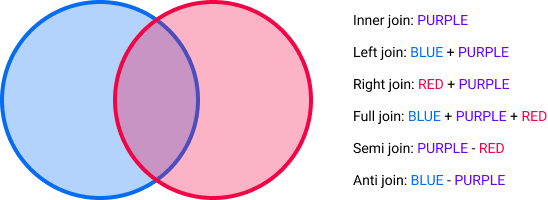

In [197]:
dataset_merge <- read_excel("(1.3) Dataset Aula Data Wrangling (Join).xls") # <-- Declarado o segundo dataset
base_renomeada_merge <- rename(dataset_merge, observacoes=Estudante) # <-- Renomeada variável para observacoes, para realização do join
base_merged <- left_join(base_renomeada, base_renomeada_merge, by = "observacoes")
 # ^-- junção dos datasets pela união na variável observacoes, trazendo dados de 'base_renomeada_merge' para 'base_renomeada' que esta a esquerda
head(base_merged, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil,Gênero
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Gabriela,15,8,0,Manhã,calmo,Feminino
Dalila,20,6,1,Manhã,moderado,Feminino
Gustavo,20,15,0,Manhã,moderado,Masculino


###Operadores de Manipulação

**n()** informa o número de observações em um grupo

In [198]:
summarise(base_renomeada,
          observações = n())

observações
<int>
10


**mean** informa a média

In [199]:
mean( c(0,110) )


[1] 55

**median** informa a mediana

In [200]:
median( c(0,110) )

[1] 55

**sd** informa o desvio padrão

In [201]:
sd( c(0,110) )

[1] 77.78175

**min** informa o valor mínimo

In [202]:
min( c(0,110) )

[1] 0

**max** informa o valor máximo

In [203]:
max ( c(0,110) )

[1] 110

**arrange** ordena de forma crescente ou decrecente o dataset

In [204]:
base_ordenada <- arrange(base_renomeada, tempo)
head(base_ordenada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Ana,10,5,0,Manhã,calmo
Gabriela,15,8,0,Manhã,calmo
Dalila,20,6,1,Manhã,moderado


In [205]:
base_ordenada <- arrange(base_renomeada, desc(tempo))
head(base_ordenada, n=3)

observacoes,tempo,distancia,semaforos,periodo,perfil
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Antônio,55,32,3,Tarde,calmo
Luiz Ovídio,50,25,2,Tarde,agressivo
Letícia,40,20,1,Tarde,agressivo


**as.numeric** transforma variáveis string em tipo numérico.

In [206]:
as.numeric('1')

[1] 1

**str_sub** realiza a seleção em uma string retirando a parte desejada.

In [207]:
str_sub('MBAUSP', 4, 6)

[1] "USP"

**replace** realiza substituições das informações segundo critérios estabelecidos.

In [208]:
dataset1 <- data.frame(nome = c('Ana', 'Brna'), idade = c(14,21))
mutate(dataset1, nome = replace(nome, nome=='Brna', 'Bruna'))

nome,idade
<chr>,<dbl>
Ana,14
Bruna,21


**data.frame** cria um dataframe.

In [209]:
data.frame(nome = c('Ana', 'Bruna'), idade = c(20,21))

nome,idade
<chr>,<dbl>
Ana,20
Bruna,21


##Aula III

###Markdown

As **divisões** São realizadas utilizando hashtags ( # ) antes do trecho , aplicando níveis e subníveis.

O **negrito** é escrito utilizando dois asteriscos ( ** ) iniciando e finalizando o trecho.

**Exemplo**

O **itálico** é escrito utilizando um asterisco ( * ) iniciando e finalizando o trecho. 

*Exemplo*

O **taxado** é escrito utilizando dois tils (~) antes e depois do trecho. 

~~Exemplo~~

O **blockquote** ou recuo do texto é realizado pelo sinal de maior ( > ).

> Exemplo



A **lista ordenada** é realizada utilizando números com pontos no início do trecho.

1. Exemplo

A **lista não ordenada** é realizada utilizando hífen ( - ) no início do trecho.

- Exemplo

A **lista de tarefas** é realizada utilizando hífen ( - ) em conjunto com colchetes ( [ ] ).

- [x] Exemplo de tarefa realizada.
- [ ] Exemplo de tarefa não realizada.

O **trecho de código** é descrito entre crazes ( ` ).

`print()`

Uma **linha horizontal** utilizada para divisão de seções, é criada utilizando três hífens (-).

Exemplo:

---

Um **link** é criado utilizando colchetes ( [ ] ) para o título e parenteses ( ( ) ) para o endereço do link.

Exemplo: [Google](https://www.google.com.br/)

Uma **imagem** é adicionada utilizando colchetes ( [ ] ) para o título e parenteses ( ( ) ) para o endereço da imagem.

Exemplo: 

![Google Logo](https://www.google.com.br/logos/doodles/2021/seasonal-holidays-2021-6753651837109324-law.gif)

Uma **tabela** é adicionada utilizando pipes ( | ) para sepação de colunas e hífes ( - ) para separação dos cabeçalhos da tabela.

| Coluna 1 | Coluna 3 | Coluna 2 |
|:--- | :---: | ---: |
| texto1 | texto2 | texto3 |
| texto1 | texto2 | texto3 |

Um **bloco de código** é adicionado utilizando três crazes ( ` ) ao início e ao final do bloco, podendo ester ser estilizado adicionando a informação do tipo de código ao bloco.

```json
{
  "firstName": "John",
  "lastName": "Smith",
  "age": 25
}
```

As **espressões mátematicas** são adicionadas utilizando cifrões no início e ao término da expressão.

$ a + b^2 /c $

###Operadores de Manipulação

**na_if** realiza a substituição de valores correspondentes por *NA*.

In [210]:
dataset1 <- data.frame(nome = c('Ana', ''), idade = c(14,21))
dataset1$nome <- na_if(dataset1$nome, '')

dataset1

nome,idade
<chr>,<dbl>
Ana,14
NA,21


**coalesce** realiza a substituição de NA por um valor especifico.

In [211]:
dataset1 <- data.frame(nome = c('Ana', NA), idade = c(14,21))
dataset1$nome <- coalesce(dataset1$nome, 'Desconhecido')

dataset1

nome,idade
<chr>,<dbl>
Ana,14
Desconhecido,21


**str_detect** realiza uma comparação de strings no padrão apresentado.

In [212]:
vetor1 <- c('ana', 'maria', 'joão', 'antonio')
str_detect(vetor1, '^a') # <-- verifica nomes que começam com a letra 'a'

[1]  TRUE FALSE FALSE  TRUE

**pivot_wider** remodela um dataset para um formato mais amplo.

In [213]:
base_wider <- pivot_wider(base_renomeada,id_cols = observacoes, names_from = periodo, values_from = perfil)

head(base_wider, n=5)

observacoes,Manhã,Tarde
<chr>,<chr>,<chr>
Gabriela,calmo,NA
Dalila,moderado,NA
Gustavo,moderado,NA
Letícia,NA,agressivo
Luiz Ovídio,NA,agressivo


**pivot_longer** remodela um dataset para um formato mais longo.

In [214]:
base_longer <- pivot_longer(base_wider, !observacoes, names_to = 'periodo', values_to = 'perfil')

head(base_longer, n=5)

observacoes,periodo,perfil
<chr>,<chr>,<chr>
Gabriela,Manhã,calmo
Gabriela,Tarde,NA
Dalila,Manhã,moderado
Dalila,Tarde,NA
Gustavo,Manhã,moderado


##Aula IV

###Funções

**function** declara uma função personalizada, onde variaveis são declaradas entre parenteses e as operações entre chaves, utilizando o return para definir o retorno da função.

In [215]:
exemplo_funcao <- function(variavel) {
  return (variavel * 2)
}
exemplo_funcao(2)

[1] 4

###Condições

**if** declara uma condição se, onde a condição verificada é declarada entre parenteses e caso a condição seja verdadeira, o conteudo declarado entre chaves é executado.

In [216]:
if(1 < 100) {
  "Sim, 1 é menor que 100"
}

[1] "Sim, 1 é menor que 100"

**else** complementa o if, onde o else é executado caso a condição do if seja falsa.

In [217]:
if(1000 < 100) {
  "Sim, 1000 é menor que 100"
} else {
  "Não, 1000 não é menor que 100"
}

[1] "Não, 1000 não é menor que 100"

**else if** é uma etapa intermediária entre o if e o else onde desejamos realizar múltiplos testes, onde neste caso a opção executada se torna a primeira condição verdadeira, ou else caso todas as anteriores sejem falsas.

In [218]:
if(1000 < 1000) {
  "Sim, 1000 é menor que 1000"
} else if (1000 == 1000) { 
  "Sim, 1000 é igual a 1000"
} else {
  "Não, 1000 não é menor que 1000 e 1000 não é igual a 1000"
}

[1] "Sim, 1000 é igual a 1000"

###Iterações

**map** aplica funções a vetores iterando por cada elemento do vetor. Seu retorno é uma lista com os valores resultantes da função.

In [219]:
vetor1 <- c(1:5)
function1 <- function(x){return (x * 2)}
map(vetor1, function1)

[[1]]
[1] 2

[[2]]
[1] 4

[[3]]
[1] 6

[[4]]
[1] 8

[[5]]
[1] 10

**map_lgl** atua de maneira semelhante ao map, porém seu retorno é um vetor com valores lógicos FALSE ou TRUE.

In [220]:
vetor1 <- c(1:5)
function1 <- function(x){return (x >= 3)}
map_lgl(vetor1, function1)

[1] FALSE FALSE  TRUE  TRUE  TRUE

**map_int** atua de maneira semelhante ao map, porém seu retorno é um vetor com valores inteiros, 0 ou 1 para comparações lógicas.

In [221]:
vetor1 <- c(1:5)
function1 <- function(x){return (x >= 3)}
map_int(vetor1, function1)

[1] 0 0 1 1 1

**map_dbl** atua de maneira semelhante ao map, porém seu retorno é um vetor com valores em double, ou seja, com casas decimais.

In [222]:
vetor1 <- c(1:5)
function1 <- function(x){return (round((x / 3), digits = 2))}
map_dbl(vetor1, function1)

[1] 0.33 0.67 1.00 1.33 1.67

**map_chr** atua de maneira semelhante ao map, porém seu retorno é um vetor com valores em caracteres, ou seja, em texto.

In [223]:
vetor1 <- c(1:5)
function1 <- function(x){return (x >= 3)}
map_chr(vetor1, function1)

[1] "FALSE" "FALSE" "TRUE"  "TRUE"  "TRUE"

**map2** atua de maneira semelhante ao map, porém utilizando duas variáveis.

In [224]:
vetor1 <- c(1:5) # <-- se tornará X
vetor2 <- c(1:5) # <-- se tornará Y
function1 <- function(x, y){return (x * y)}
map2(vetor1, vetor2, function1)

[[1]]
[1] 1

[[2]]
[1] 4

[[3]]
[1] 9

[[4]]
[1] 16

[[5]]
[1] 25

**pmap** atua de maneira semelhante ao map, porém utilizando n variáveis. Sendo que os vetores necessitar estar agrupados em uma lista para realização do pmap.

In [225]:
vetor1 <- c(1:5) # <-- se tornará X
vetor2 <- c(1:5) # <-- se tornará Y
vetor3 <- c(1:5) # <-- se tornará Z
vetor_list <- list(vetor1, vetor2, vetor3)
function1 <- function(x, y, z){return (x * y * z)}
pmap(vetor_list, function1)

[[1]]
[1] 1

[[2]]
[1] 8

[[3]]
[1] 27

[[4]]
[1] 64

[[5]]
[1] 125

**invoke_map** atua de maneira semelhante ao map, porém com uma lista de funções e uma lista de parametros, fazendo uma iteração de parâmetros e funções.

In [226]:
function1 <- function(x, y){return (x * y)}
function2 <- function(z, w){return (z == w)}
parameters1 <- list(x = 2, y = 3) # <-- serão utilizados na primeira função
parameters2 <- list(z = 6, w = 6) # <-- serão utilizados na segunda função
function_list <- list(function1, function2)
parameters_list <- list(parameters1, parameters2)
invoke_map(function_list, parameters_list)


[[1]]
[1] 6

[[2]]
[1] TRUE

###Operadores de Manipulação

**list** cria uma ou mais listas. 

In [227]:
list(1:5,6:10)

[[1]]
[1] 1 2 3 4 5

[[2]]
[1]  6  7  8  9 10

**rnorm** cria uma distribuição normal, aleatória e conforme aos parâmetros estabelecidos.

In [237]:
rnorm(mean = 10, sd = 5, n = 5) # <-- mean é a média, sd é o desvio padrão, e n é o numero de observações.

[1] 12.902425 -7.429034  7.273741  9.225170 10.145264

**rpois** cria uma distribuição poisson, aleatória e conforme aos parâmetros estabelecidos.

In [244]:
rpois(lambda = 10 , n = 5) # <-- lambda é o número total de eventos dividido pelo número de unidades , e n é o numero de observações.

[1] 11 12 13  8 10

**summary** gera estatísticas descritivas do dataset. 
obs. O parâmetro quantile.type pode ser utilizado para utilizar um método padrão específico.

In [246]:
summary(base_renomeada)

 observacoes            tempo         distancia       semaforos   
 Length:10          Min.   :10.00   Min.   : 5.00   Min.   :0.00  
 Class :character   1st Qu.:20.00   1st Qu.: 8.75   1st Qu.:0.25  
 Mode  :character   Median :27.50   Median :17.50   Median :1.00  
                    Mean   :30.00   Mean   :17.00   Mean   :1.00  
                    3rd Qu.:38.75   3rd Qu.:23.75   3rd Qu.:1.00  
                    Max.   :55.00   Max.   :32.00   Max.   :3.00  
   periodo             perfil         
 Length:10          Length:10         
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      